# Demonstration for Google Colab

## Clean Elon data

### Import data

In [ ]:
import pandas as pd

download from [data.world](https://data.world/adamhelsinger/elon-musk-tweets-until-4-6-17)

In [ ]:
from requests import get

response = get("https://raw.githubusercontent.com/konbraphat51/AnimatedWordCloudExampleElon/main/elonmusk_tweets.csv").content

with open("/content/elonmusk_tweets.csv", "wb") as f:
  f.write(response)

In [ ]:
df = pd.read_csv("/content/elonmusk_tweets.csv")

df.head(5)

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [ ]:
df.dtypes

id             int64
created_at    object
text          object
dtype: object

In [ ]:
df["created_at"] = pd.to_datetime(df["created_at"])

df.head(5)

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [ ]:
df.dtypes

id                     int64
created_at    datetime64[ns]
text                  object
dtype: object

In [ ]:
from datetime import datetime as dt

In [ ]:
dfs_by_year = []

for year in range(2012, 2018):
    df_year = df[dt(year, 1, 1) <= df["created_at"] ]
    df_year = df_year[dt(year+1, 1, 1) > df_year["created_at"]]
    dfs_by_year.append(df_year)
    print(df_year.shape)

(316, 3)
(478, 3)
(232, 3)
(436, 3)
(935, 3)
(377, 3)


### Make Word Vector Timelapse

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
stopwords = ["the", "co", "http", "to", "of", "and", "on", "for", "just", "that", "with", "by", "is", "in", "at", "will"]

In [ ]:
min_df = 10

counter = CountVectorizer(stop_words=stopwords)

dicts_by_year = []

for cnt in range(len(dfs_by_year)):
    np_year = counter.fit_transform(dfs_by_year[cnt]["text"]).toarray()
    df_year = pd.DataFrame(np_year, columns=counter.get_feature_names_out())

    sr_sum = df_year.sum(axis=0).sort_values(ascending=False)

    sr_sum = sr_sum[sr_sum >= min_df]

    #to dictionary
    dict_year = sr_sum.to_dict()

    print(dict_year)

    dicts_by_year.append(dict_year)


{'rt': 47, 'model': 38, 'we': 37, 'spacex': 37, 'tesla': 33, 'dragon': 33, 'xe2': 31, 'x80': 31, 'it': 29, 'this': 26, 'rocket': 25, 'was': 25, 'space': 24, 'be': 21, 'are': 21, 'my': 21, 'an': 19, 'from': 19, 'about': 18, 'not': 18, 'now': 18, 'nasa': 17, 'all': 17, 'first': 17, 'station': 16, 'our': 15, 'amp': 15, 'people': 14, 'good': 14, 'more': 14, 'but': 14, 'most': 13, 'has': 13, 'time': 13, 'like': 12, 'as': 12, 'do': 12, 'you': 12, 'great': 12, 'test': 12, 'falcon': 12, 'mars': 11, 'launch': 11, 'x9c': 10, 'would': 10, 'x9d': 10, 'solar': 10}
{'tesla': 79, 'rt': 59, 'xe2': 58, 'x80': 58, 'it': 57, 'amp': 48, 'be': 47, 'model': 45, 'we': 44, 'but': 35, 'rocket': 34, 'launch': 34, 'not': 34, 'good': 33, 'this': 33, 'from': 32, 'you': 32, 'about': 31, 'teslamotors': 31, 'are': 29, 'all': 29, 'was': 27, 'spacex': 27, 'my': 27, 'so': 26, 'like': 25, 'am': 23, 'elonmusk': 21, 'have': 21, 'no': 21, 'thanks': 20, 'car': 20, 'as': 19, 'there': 18, 'do': 18, 'time': 18, 'x9d': 17, 'can'

In [ ]:
wordvector_timelapse = []

for cnt in range(len(dicts_by_year)):
    year = 2012 + cnt
    wordvector_timelapse.append((year, dicts_by_year[cnt]))

## Test AnimatedWordCloud

In [ ]:
!pip install AnimatedWordCloudTimelapse==0.9.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.5 MB/s eta 0:00:00
  Attempting uninstall: AnimatedWordCloudTimelapse
    Found existing installation: AnimatedWordCloudTimelapse 0.9.4
    Uninstalling AnimatedWordCloudTimelapse-0.9.4:
      Successfully uninstalled AnimatedWordCloudTimelapse-0.9.4


### make animation

In [ ]:
from AnimatedWordCloud import animate, Config

config = Config(output_path="/content/")
result = animate(wordvector_timelapse, config)

### Show result

<class 'IPython.core.display.Image'>


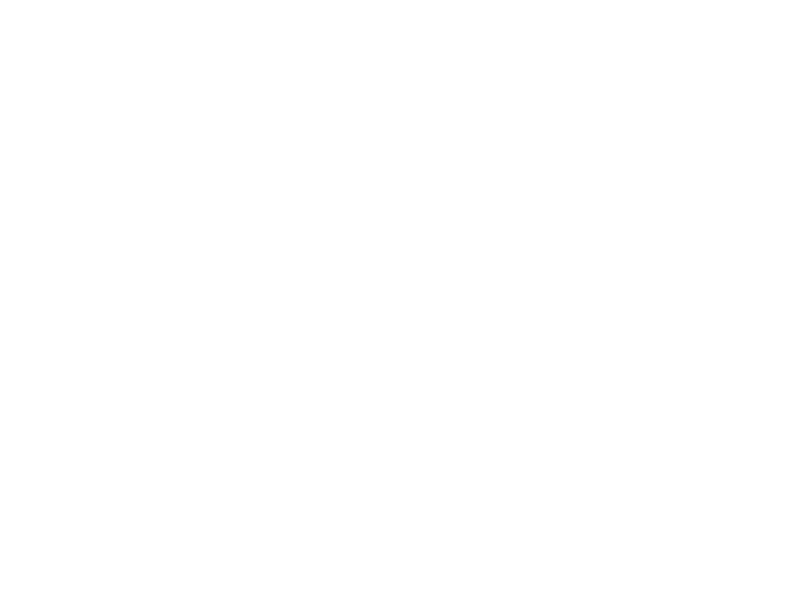

In [ ]:
from IPython.display import display, Image

with open('/content/output.gif','rb') as f:
    display(Image(data=f.read(), format='png'))